# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

[Acceso al Repositorio](https://github.com/MartinaFerrero/Acamica)

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


Se importan los datasets con la información del paso de vehículos por las unidades de peaje AUSA para los años 2017, 2018 y 2019.

Fuente: Autopistas Urbanas (AUSA). Secretaría de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros. Gobierno de la Ciudad de Buenos Aires.

Se procede a realizar el análisis exploratorio de datos.


In [152]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [153]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [154]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [155]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [156]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [157]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [158]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [159]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [160]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [161]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [162]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [163]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


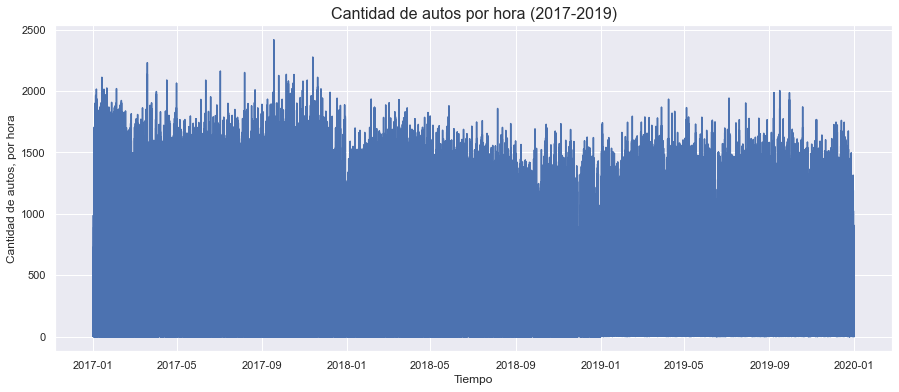

In [164]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2017-2019)", fontsize = 16)
plt.show()

In [165]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


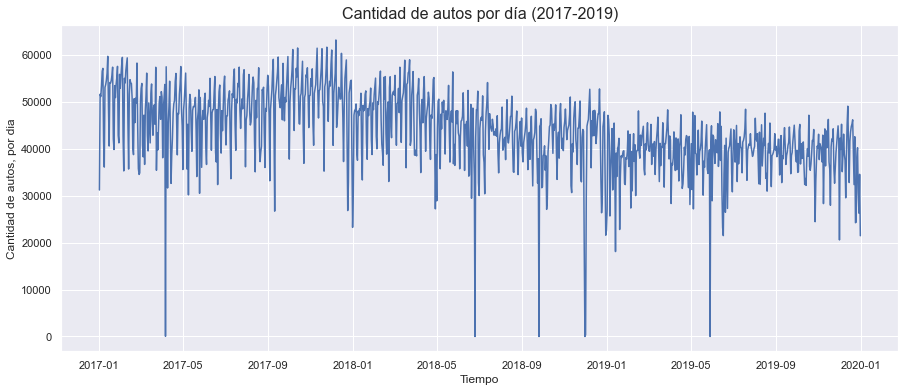

In [166]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019)", fontsize = 16)
plt.show()

### Exploración de datos


**Detección de valores atípicos**:

Al observar el gráfico con la distribución de la cantidad de autos por día, se observan algunos valores atípicos, especialmente, en aquellos registros inferiores a los 10.0000 pasos diarios. Para no alterar el índice eliminando dichos registros, se procede a asignarlos como NaN, para luego reemplazar estos últimos por el valor medio de la serie.



In [167]:
diario.cantidad_pasos[diario.cantidad_pasos < 10000] = np.nan

diario['cantidad_pasos']=diario.cantidad_pasos.fillna(diario.cantidad_pasos.rolling(4, min_periods=1).mean())


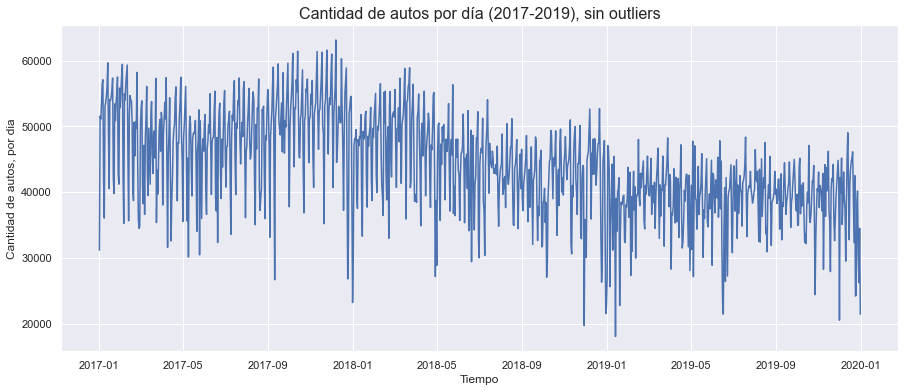

In [168]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019), sin outliers", fontsize = 16)
plt.show()

**Distribución de pasos por día:** Al realizar un histograma sobre la distribución de la cantidad de pasos diarios, puede observarse que la misma es simétrica, aproximándose a una distribución gaussiana.

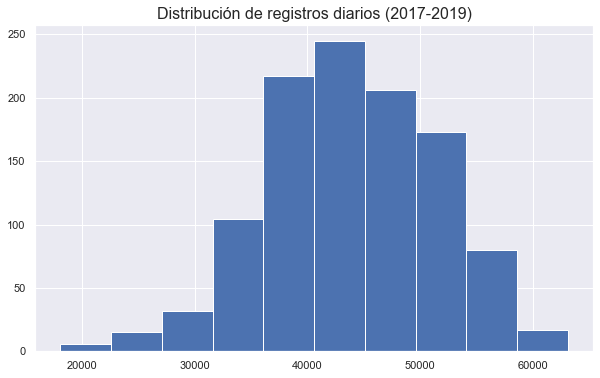

In [169]:
plt.figure(figsize = (10,6))
plt.hist(diario.cantidad_pasos)
plt.title("Distribución de registros diarios (2017-2019)", fontsize = 16)
plt.show()

**Valores faltantes:** Para verificar la composición de la serie con la que se está trabajando, se imprimen la cantidad de valores faltantes por columnas que, al ser 0 (cero), permite continuar con el flujo de trabajo.

In [170]:
print('Cantidad de valores faltantes por columnas')
diario.isnull().sum()

Cantidad de valores faltantes por columnas


cantidad_pasos    0
dtype: int64

In [171]:
#Se realiza una copia del dataser original para continuar trabajando 

dt_original = diario.copy()
dt_original.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


**Cantidad promedio de pasos según año:** En el siguiente gráfico puede observarse el promedio de pasos diarios por año. Así, se advierte que el flujo va disminuyendo con el paso de los años, con el mayor promedio de registros en 2017, y el menor en 2019. Esto puede deberse a una disminución en el tráfico por la Autopista, o bien, puede pensarse que existió una migración en la forma de pago utilizada, y que los automovilistas optaron, por ejemplo, por abonar con "Telepase".

Text(0.5, 1.0, 'Cantidad promedio de pasos diarios según año')

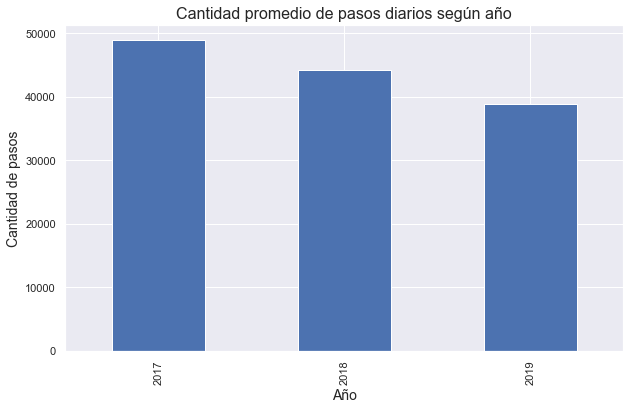

In [172]:
dt_original.reset_index(inplace=True)

plt.figure(figsize = (10,6))
dt_original.groupby(dt_original.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos diarios según año", fontsize = 16)

**Cantidad promedio de pasos según mes:** Al graficar los promedios de pasos mensuales para toda la serie, no se advierten marcadas difernecias entre los meses del año. Incluso, los registros no toman valores muy diferentes en los meses de verano en los que se podrían esperar valores más bajos debido a que son períodos en los que es usual que la población que reside y trabaja en la Ciudad y Provincia de Buenos Aires toma vacaciones. De hecho, febrero y marzo son algunos de los meses con promedios más altos.

Text(0.5, 1.0, 'Cantidad promedio de pasos según mes')

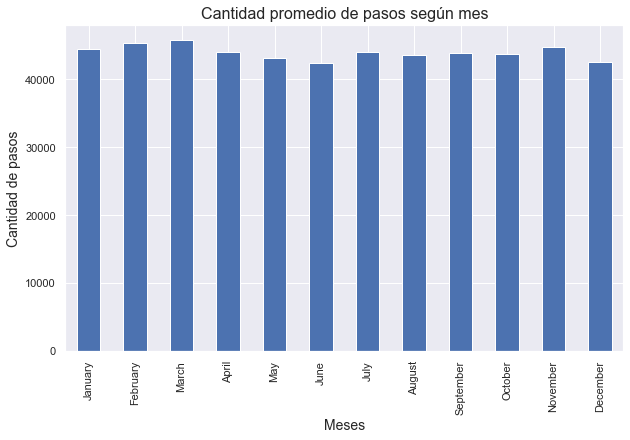

In [173]:

dt_original.reset_index(inplace=True)


plt.figure(figsize = (10,6))
dt_original.groupby(dt_original.fecha.dt.month_name(), sort=False)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Meses', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según mes", fontsize = 16)

**Cantidad de pasos según día de la semana:**

In [174]:
dias= dt_original.groupby(dt_original.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
dias

,index,cantidad_pasos
fecha,,
Friday,85410,7.683112e+06
Thursday,85254,7.353255e+06
Wednesday,85098,7.163005e+06
Tuesday,86036,6.901987e+06
Monday,85879,6.732595e+06
Saturday,85566,6.473091e+06
Sunday,85722,5.791961e+06


In [175]:
dias= dataset.groupby(dataset.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
dias

,cantidad_pasos
fecha,
Friday,7647272
Thursday,7302169
Wednesday,7125526
Tuesday,6865551
Monday,6691387
Saturday,6441715
Sunday,5791961


Text(0.5, 1.0, 'Cantidad promedio de pasos según día de la semana')

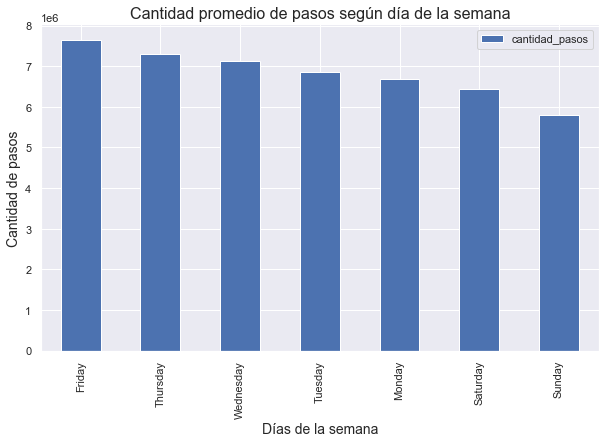

In [176]:
sns.set(rc={'figure.figsize':(10,6)})
dias.plot.bar()
plt.xlabel('Días de la semana', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según día de la semana", fontsize = 16) #source=false

En el gráfico previamente visualizado sobre la cantidad promedio de pasos según el día de la semana, puede apreciarse que los mayores registros se ubican en los días viernes, y los más bajos en los sábados y domingos. Al ser estos últimos días no laborables, se observa que el flujo de circulación disminuye conforme a lo que podría ser esperado. 

El mayor promedio obtenido en los días viernes, podría ser explicado debido a la movilidad que tiene lugar usualmente en estos días, en la cual muchos trabajadores utilizan sus autos particulares para dirigirse a sus trabajos. Además, puede ocurrir que quienes viven en la Ciudad de Buenos Aires y tienen residencias de fin de semana en la Provincia, viajen a las mismas en estos días, incrementando el flujo en relación al resto de los días de la semana.

**Pasos según fin de semana / días de la semana**

In [177]:
#weekend variable

dt_original['day of week']=dt_original['fecha'].dt.dayofweek
temp=dt_original['fecha']

In [178]:
def applyer(row):
    if row.dayofweek== 5 or row.dayofweek==6:
        return 1
    else:
        return 0
    
temp2=dt_original['fecha'].apply(applyer)
dt_original['weekend']=temp2

Text(0.5, 1.0, 'Cantidad promedio de pasos según día de la semana / fin de semana')

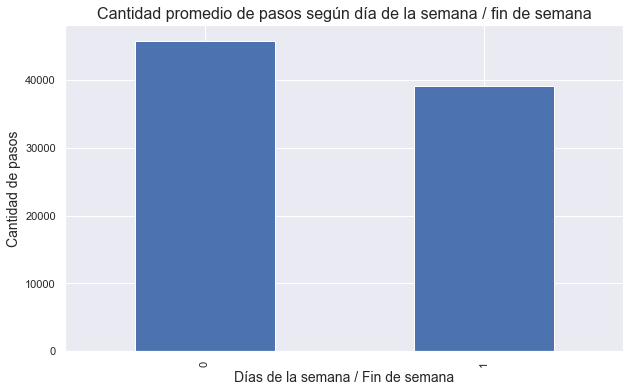

In [179]:
#Count on weekend

plt.figure(figsize = (10,6))
dt_original.groupby('weekend')['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Días de la semana / Fin de semana', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad promedio de pasos según día de la semana / fin de semana", fontsize = 16)

En el gráfico previamente visualizado, puede observarse que el tráfico disminuye los días de fin de semana (1), en comparación con el flujo registrado en los días hábiles.

**Resamplear a semanal y mensual**

A continuación, se realizan dos gráficos para resamplear la serie según la cantidad de pasos por semana y por mes. Dadas las observaciones obtenidas, se aprecia que al trabajar con un dataset con registros diarios, se obtiene una visualización más amigable, la cual va a permitir trabajar los puntos restantes de una manera más adecuada. 

In [180]:
#resampleo semanal

semanal_check= dataset.resample('W', on = 'fecha').mean().reset_index()
semanal_check.head()

,fecha,cantidad_pasos
0,2017-01-01,134.991342
1,2017-01-08,159.344654
2,2017-01-15,168.002293
3,2017-01-22,162.963047
4,2017-01-29,161.540319


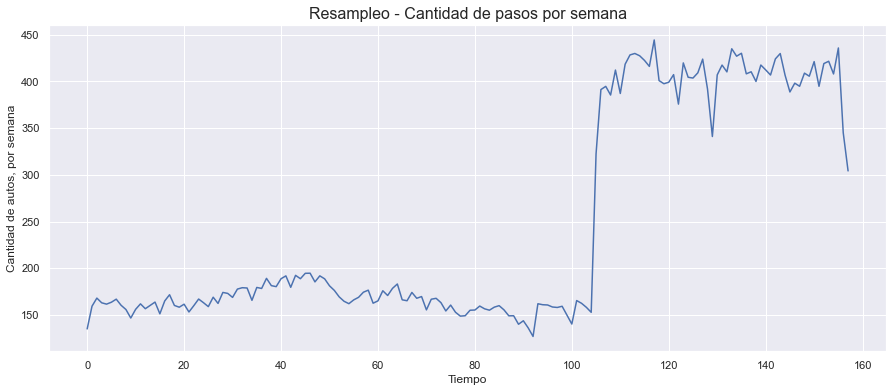

In [181]:
plt.figure(figsize = (15,6))
plt.plot(semanal_check.index, semanal_check.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title("Resampleo - Cantidad de pasos por semana", fontsize = 16)
plt.show()

In [182]:
#resampleo mensual

month_check= dataset.resample('M', on = 'fecha').mean().reset_index()
month_check.head()

,fecha,cantidad_pasos
0,2017-01-31,162.590631
1,2017-02-28,158.464659
2,2017-03-31,158.481380
3,2017-04-30,162.467187
4,2017-05-31,158.675688


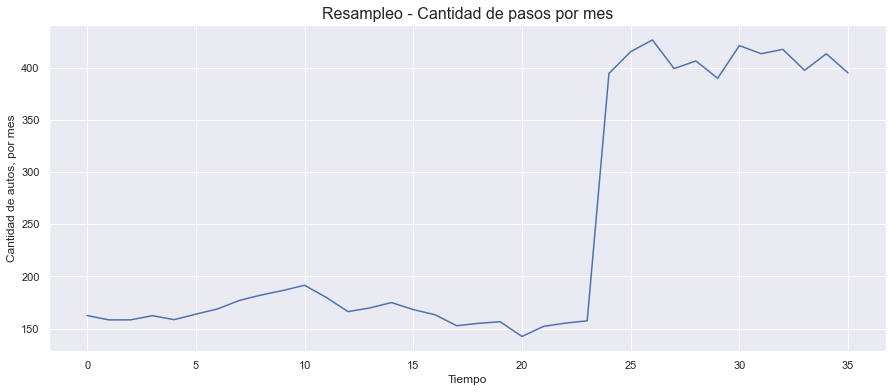

In [183]:
plt.figure(figsize = (15,6))
plt.plot(month_check.index, month_check.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.title("Resampleo - Cantidad de pasos por mes", fontsize = 16)
plt.show() 

**Autocorrelación**

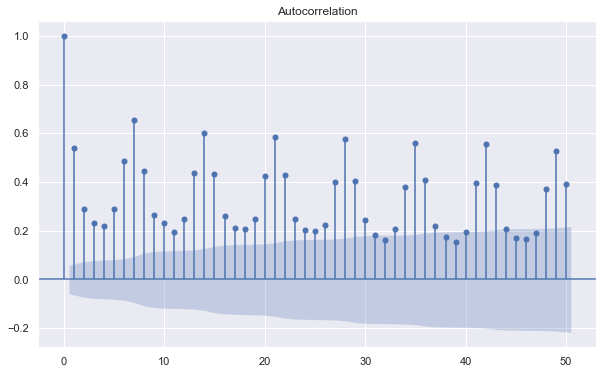

In [184]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 50)
plt.show() 

Al realizar la gráfica de autocorrelación, puede observarse un marcado componente semanal que, precisamente, nos permite afirmar que en la serie tiene ciclos semanales.

In [185]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


#### Componentes de la serie

A continuación se grafican distintos pronósticos de media móvil usando 7 (semanal), 14 (quincenal) y 30 observaciones (mensual), probando distintas ventanas de tiempo para obervar qué es lo que captura la serie.

En el primero de los gráficos vemos cada dinámica y cómo se suaviza. Así, buscamos una media móvil cada 7 días, cada una quincena, y cada mes. Y aún así, en las 3 mediciones, vemos cómo continúa suavizándose, y que la gran disparidad que hay al inicio de la distribución es más bien semanal, pero se va suavizando a medida que apliamos la ventana. 

Esto último es así dado que, a medida que se ampliían esas ventanas, estamos promediando sobre una mayor cantidad de datos.

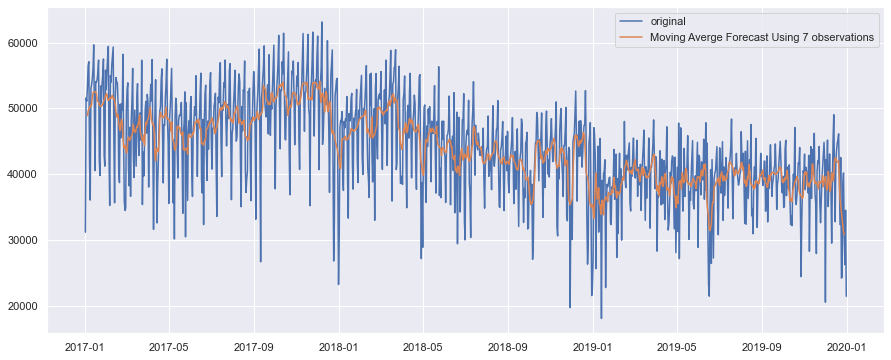

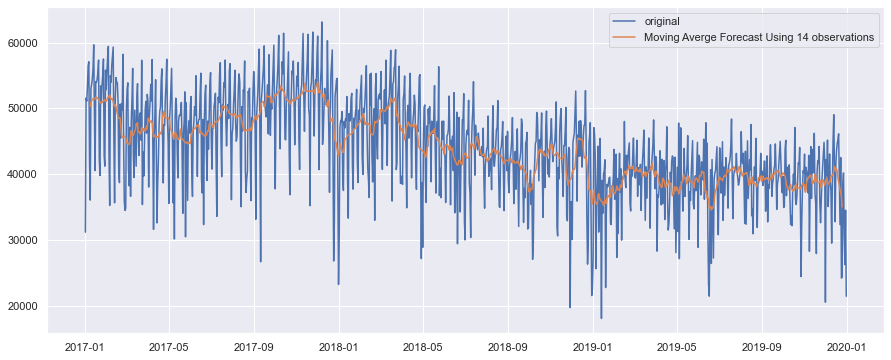

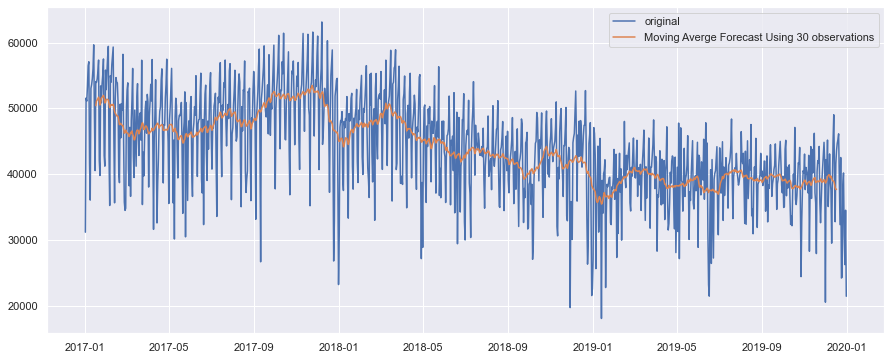

In [186]:

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(7, center=True).mean() # promedio 7 observaciones
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 7 observations')
plt.legend(loc='best')
plt.show()

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(14, center=True).mean() # promedio quincena 
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 14 observations')
plt.legend(loc='best')
plt.show()

ventana= diario.copy()
ventana['moving_avg_forecast']=diario['cantidad_pasos'].rolling(30, center=True).mean() # promedio mensual
ventana=pd.DataFrame(ventana).set_index(diario.index.values)
plt.figure(figsize = (15,6))
plt.plot(diario['cantidad_pasos'], label='original')
plt.plot(ventana['moving_avg_forecast'], label= 'Moving Averge Forecast Using 30 observations')
plt.legend(loc='best')
plt.show()


**Descomposición de la serie**

A continuación se gráfica la descomposición de la serie, para así poder identificar y calcular los diversas componentes existentes, su tendencia, estacionalidad residuos. Se utiliza un modelo aditivo, apropiado cuando la magnitud de las fluctuaciones estacionales de la serie no varíaa al hacerlo la tendencia.

Así, al analizar el comportamiento a largo plazo de la serie, se puede observar una tendencia negativa que, como se mencionó con anteiroridad, tiene que ver con esta disminución del flujo de tráfico diario, al menos, para los pagos en efectivo. Por lo tanto, la dirección global que va tomando la serie es decreciente.

También, al estudiar el comportamiento periódico de la serie, se aprecian esos ciclos mencionados previamente, como procesos que tienen comportamientos repetitivos a lo largo del tiempo.

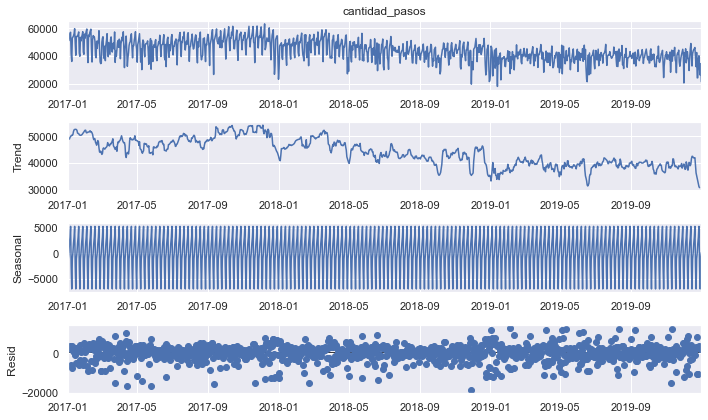

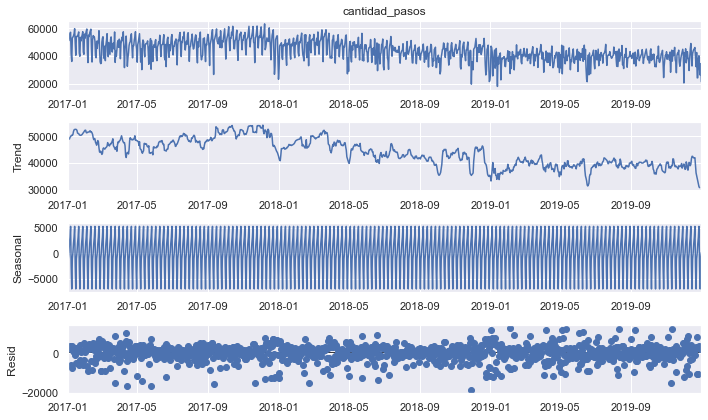

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')
result.plot()

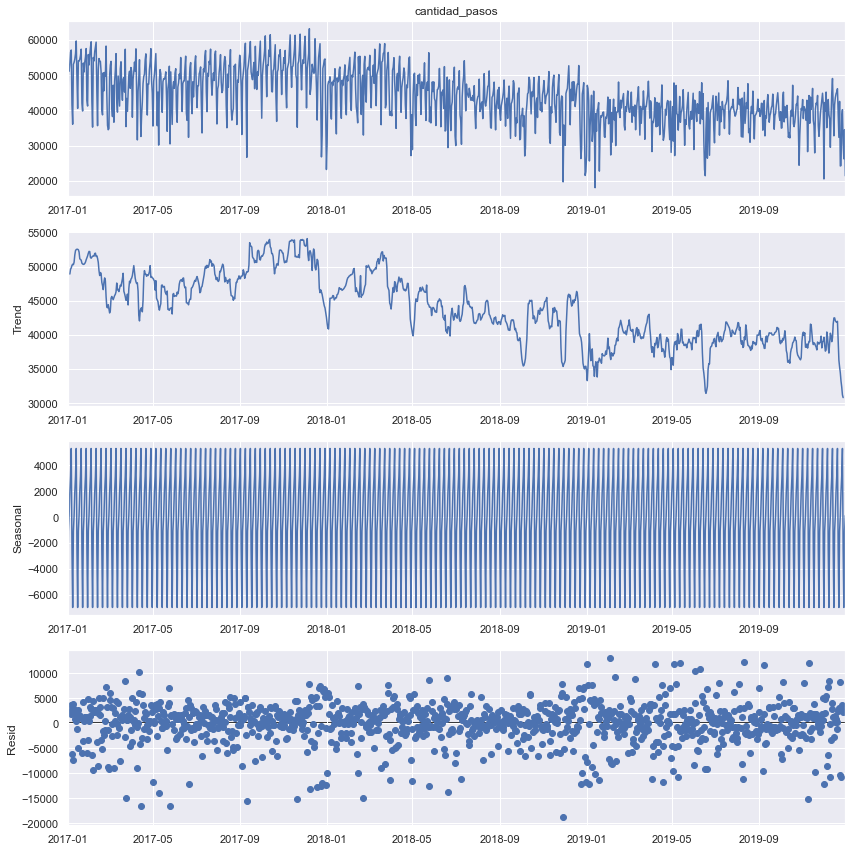

In [188]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Histograma de los residuos**

Por útltimo, se realiza un histograma para obervar los residuos y, al graficarlo, puede observarse que los mismos adoptan una distribución casi asimétrica negativa.

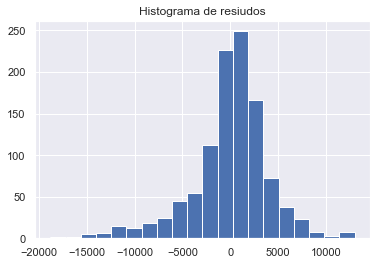

In [189]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.title("Histograma de resiudos", fontsize = 12)
plt.show()

**Dickey-Fuller test**

Con el fin de determinar las propiedades de estacionariedad de la serie se aplica el Test de Dickey Fuller, y se puede afirmar que la misma se trata de una serie no estacionaria, es decir, que la media y la varianza no son constantes en el tiempo.

In [190]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.708050
p-value: 0.426970
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568



Valor p> 0.05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

In [191]:
X = diario.cantidad_pasos
result = adfuller(np.log(X)) #hacemos un logaritmo del valor y nos vuelve a dar que no es. 
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.840356
p-value: 0.360618
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


**Análisis del Telepase como medio de pago**

A continuación se realiza la misma exploración de datos previamente efectuada pero, en este caso, se incluye al Telepase como medio de pago para ver cómo es su comportamiento a lo largo del tiempo.

In [192]:

dataset2= pd.concat([data_2019, data_2018, data_2017])
dataset2

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [193]:
#Nos quedamos solamente con la estación Illia y la forma de pago TELEPASE. HACER TODO LO MISMO DEL PREPROCESAMIENTO PERO CON TELEPASE PARA VER LO INVERSO

mascara=np.logical_and(dataset2.estacion=='Illia', dataset2.forma_pago=='TELEPASE')
dataset2=dataset2[mascara]

In [194]:
#Quitamos las columnas que no vamos a utilizar

dataset2.drop(columns= ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
20,2019-01-01,1,Martes,Centro,Liviano,59
21,2019-01-01,1,Martes,Centro,Pesado,1
23,2019-01-01,1,Martes,Provincia,Liviano,106
25,2019-01-01,1,Martes,Provincia,Pesado,2
85,2019-01-01,2,Martes,Centro,Liviano,507


In [195]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [196]:
#Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
20,Martes,Centro,Liviano,59,2019-01-01 01:00:00
21,Martes,Centro,Pesado,1,2019-01-01 01:00:00
23,Martes,Provincia,Liviano,106,2019-01-01 01:00:00
25,Martes,Provincia,Pesado,2,2019-01-01 01:00:00
85,Martes,Centro,Liviano,507,2019-01-01 02:00:00


In [197]:
#Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,9,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,3,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,7,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,275,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,459,2017-01-01 00:00:00
...,...,...,...,...,...
204607,Martes,Provincia,Liviano,600,2019-12-31 22:00:00
204608,Martes,Centro,Liviano,630,2019-12-31 22:00:00
204609,Martes,Provincia,Liviano,110,2019-12-31 23:00:00
204610,Martes,Centro,Liviano,122,2019-12-31 23:00:00


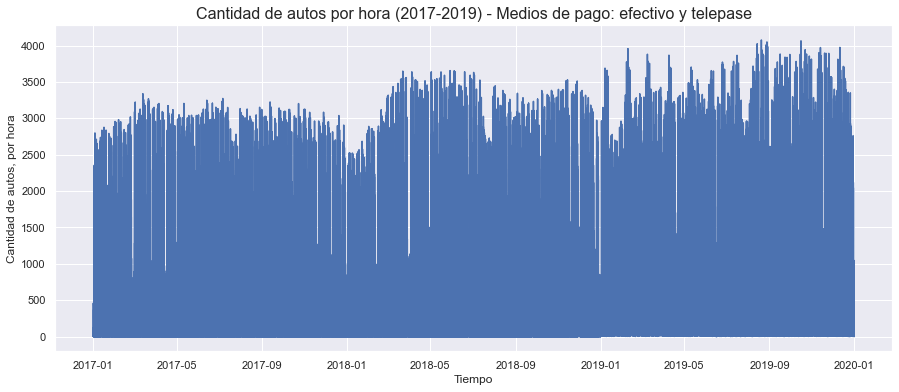

In [198]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset2.fecha, dataset2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2017-2019) - Medios de pago: efectivo y telepase", fontsize = 16)
plt.show()

In [199]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset2.resample('D', on = 'fecha').sum()
print(diario2.shape)
diario2.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


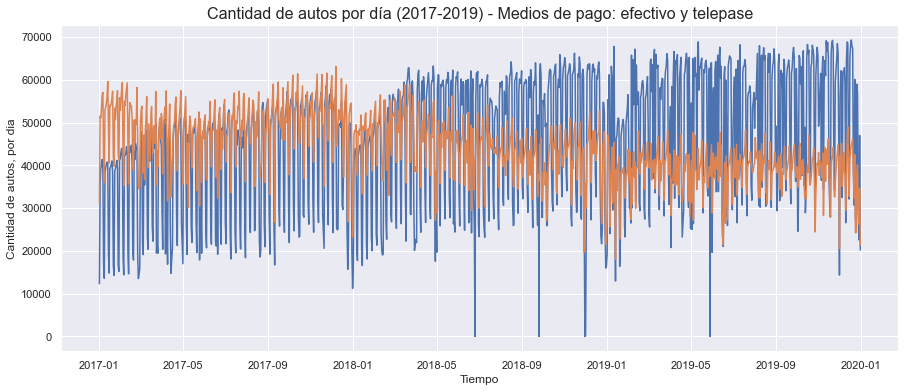

In [200]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2017-2019) - Medios de pago: efectivo y telepase", fontsize = 16)
plt.show() #en la comparación de efectivo y telepase, vemos lo opuesto

En esta última sección, se realizó solamente la exploración de la serie, incluyendo al telepase como medio de pago. Pudo observarse que, mientras que la tendencia es decreciente al observar el comportamiento de los pagos en efectivo, la tendencia de los pagos con telepase es notoriamente creciente, por lo cual no es tanto una cuestión de disminución del flujo de vehículos, sino que en realidad se produce una mutación en estas formas de abonar.

### Predicción a Futuro

A continuación, se procede a realizar un modelo benchmark, un one-step y multi-step prediction, y se trabaja con Random Forest como modelo para evaluar resultados.

Se utiliza el dataset con los registros diarios para los años 2017, 2018 y 2019, con el cual se realizó la exploración de datos y análisis posterior.

**Métrica a utilizar para la evaluación de modelos:** 

La métrica que se va a utilizar para evaluar los resultados del modelo es la raíz del error cuadrático medio (`RMSE`) y el coeficiente de determinación (`R2`), dado que ambos son útiles para describir qué tan "bueno" es un modelo para hacer predicciones. Con el r2,al tomar valores que van del 0 al 1, se pretende también tener valores que sean más "simples" de analizar a la hora de comparar los valores para el conjunto de datos de `train` y para el conjunto de datos de `test`.

Al ser la variable a predecir el flujo diario, la misma puede tomar valores muy altos y, por eso, para facilitar su interpretación, no sólo se trabaja con la raíz del error cuadrático medio, sino que también se utiliza el R2.

In [201]:
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


In [202]:
diario.shape

(1095, 1)

In [203]:
look_back=90*1 #usamos x dias de datos para predecir el valor siguiente

In [204]:
N=diario.shape[0]
X= np.zeros((N-look_back-1, look_back))
y= np.zeros(N-look_back-1)

print(X.shape, y.shape)

(1004, 90) (1004,)


In [205]:
N-365-1

729

In [206]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.values[i:i+look_back].ravel()
    y[i] = diario.values[i+look_back]

In [207]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar, entrena con los 2 primeros años
N_test = 1*365 #cantidad de intancias que vamos a usar para evaluar, en este caso con último año
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(364, 90) (364,)


**Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [208]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

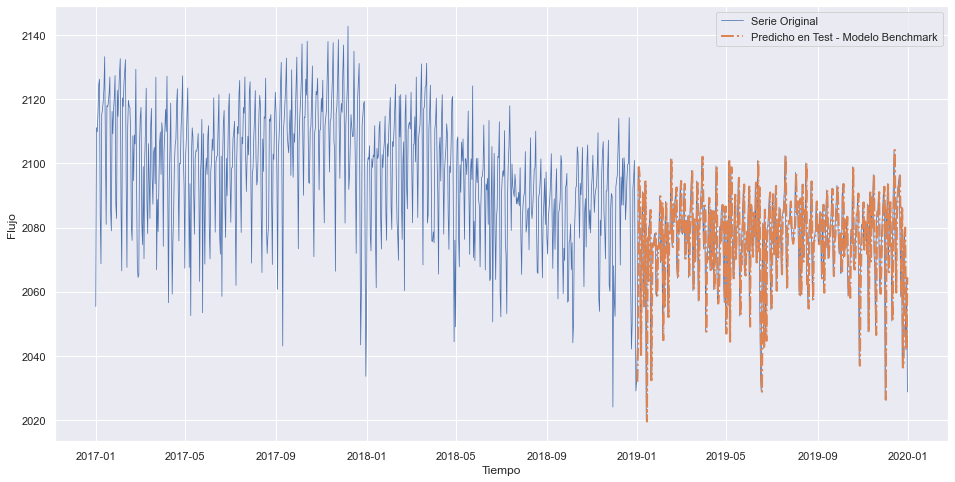

In [209]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test - Modelo Benchmark')
plt.plot(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()


In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [211]:
y_test_pred_benchmark = y[-1 + N_train-1:N_train-1+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train-1+N_test - 1])

print(np.sqrt(MSE))

6637.327662316175


In [212]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark[:-1])
MSE

55034803.38156288

### RandomForestRegressor

**One-Step Prediction**

Se va a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo. Se utilizan los dos primeros años como conjunto de entrenamiento, y el último año como conjunto de evaluación.

In [213]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs = 4).fit(X_train,y_train)

Predecimos

In [214]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [215]:
diario.index[N_train+look_back:length_total].shape

(365,)

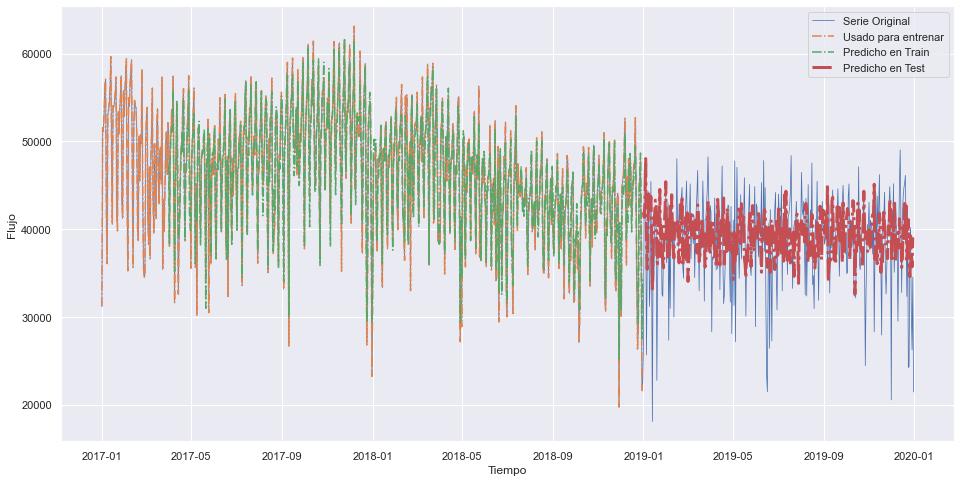

In [216]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train+look_back-1], diario[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Graficamos la importancia de cada feature

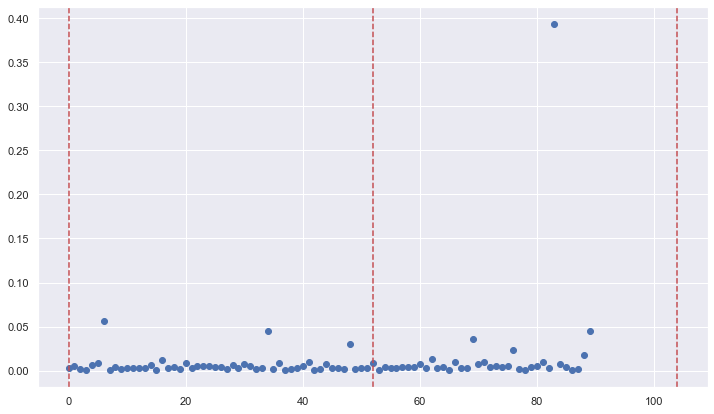

In [217]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [218]:
rf.feature_importances_

array([0.00287951, 0.00478373, 0.00229109, 0.00071909, 0.00644366,
       0.00834365, 0.05655032, 0.00072599, 0.00386558, 0.00209719,
       0.00329853, 0.00274462, 0.0027112 , 0.0028825 , 0.00642498,
       0.0011498 , 0.01192526, 0.00343021, 0.00386601, 0.00186285,
       0.0088091 , 0.00300783, 0.00534263, 0.004853  , 0.00498682,
       0.00368579, 0.0042079 , 0.00217812, 0.00611139, 0.00334566,
       0.0071279 , 0.00532793, 0.00170644, 0.00298181, 0.04469834,
       0.00217189, 0.0091355 , 0.00112234, 0.00137304, 0.00288689,
       0.00521687, 0.01004886, 0.0007478 , 0.00151159, 0.00786555,
       0.00325603, 0.00329969, 0.00209533, 0.02992375, 0.00174949,
       0.0026754 , 0.00305994, 0.00922968, 0.00121895, 0.00444151,
       0.00313416, 0.00247998, 0.00396151, 0.00433003, 0.00466986,
       0.00746765, 0.0024929 , 0.0134487 , 0.00323954, 0.00432901,
       0.00120934, 0.00989356, 0.00289449, 0.0032104 , 0.03639273,
       0.00736011, 0.00940894, 0.00444077, 0.00558982, 0.00390

**Feature importances:** Al graficar la importancia de los distintos features, puede observarse que, para el modelo, lo que más importa a la hora de predecir es el día anterior y el mismo día de la semana anterior. Al tener los valores numéricos, y considerando el look back definido (90), puede apreciarse esto mencionado, al ver que los registros que tomen valores más altos y, por ende son más importantes a la hora de predecir, se ubican en las posiciones 89 y 83.

In [219]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2087.141042929681
Error en Test: 5238.911295533011


In [220]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9153900953063242
r2 en Test: -0.0687248509769649


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


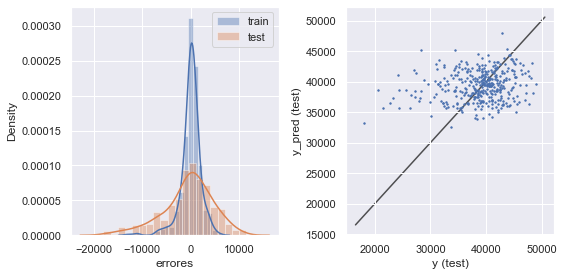

In [221]:
# Gráfico de valores reales y valores predichos para Random Forest
    
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
    
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**Multi-Step Prediction**

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [222]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)# re-del ultimo valor
y_ms_test_pred = np.array(y_ms_test_pred)

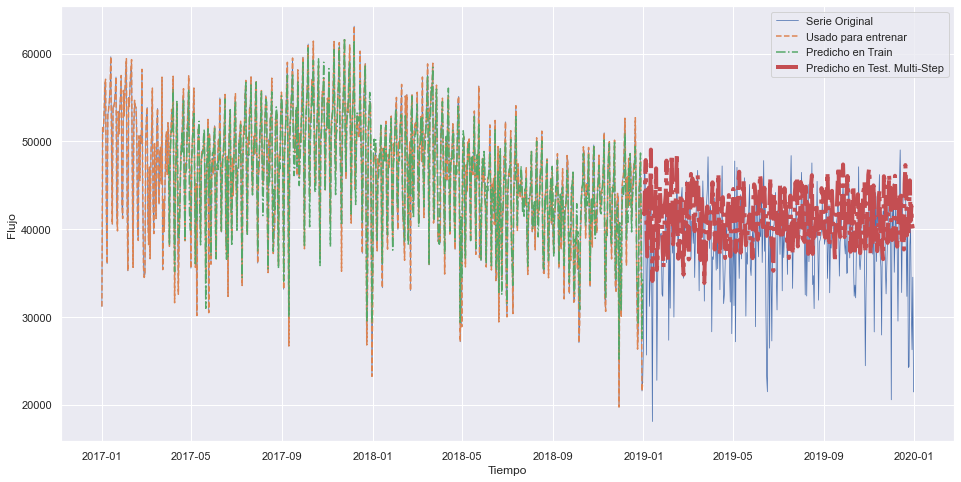

In [223]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Y calculamos el error RMSE y r2

In [224]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2087.141042929681
Error en Test: 5238.911295533011


In [225]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9153900953063242
r2 en Test: -0.0687248509769649


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


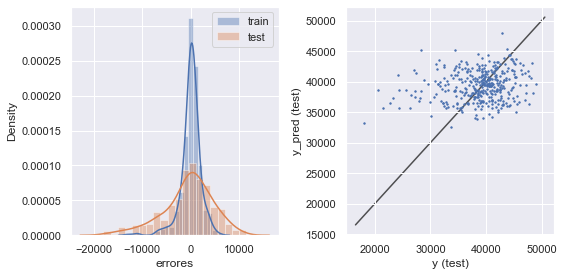

In [226]:
# Gráfico de valores reales y valores predichos para Random Forest
    
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
    
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## CV time series

A continuación, se realiza un Grid Search para efectuar la optimización de modelos pero, en este caso, se trabaja con un regresor de XGBoost. La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuenciualmente,y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados. Con esto, se buscará entrenar un modelo que tenga un mejor rendimiento en comparación al Random Forest evaluado en la sección anterior.


In [227]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [228]:
model=xgb.XGBRegressor()
param_search= {'max_depth': [3,5]}

tscv = TimeSeriesSplit(n_splits = 3)
grid_search= GridSearchCV(estimator=model, cv=tscv, scoring='neg_mean_squared_error',
                             param_grid=param_search)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                    

In [229]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [230]:
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

scores = pd.DataFrame(grid_search.cv_results_)
scores

Mejores parametros: {'max_depth': 5}
Mejor Score: -34657029.757575996



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.259686,0.050939,0.003336,0.001246,3,{'max_depth': 3},-4.672432e+07,-3.059242e+07,-3.260885e+07,-3.664186e+07,7.176744e+06,2
1,0.447000,0.104135,0.004335,0.000472,5,{'max_depth': 5},-4.424274e+07,-2.929754e+07,-3.043081e+07,-3.465703e+07,6.793892e+06,1


In [231]:
y_train_pred= grid_search.predict(X_train)
y_test_pred= grid_search.predict(X_test)

In [232]:
y_train_pred.shape

(640,)

In [233]:
y_test_pred.shape

(364,)

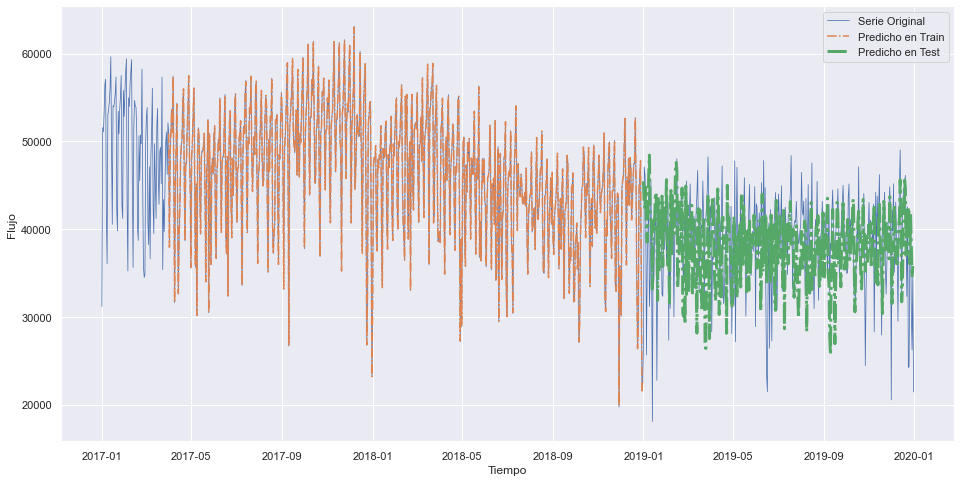

In [234]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

In [235]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 57.49896571236376


In [236]:
MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 6338.972328921977


In [237]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.9999357848244114
r2 en Test: -0.5646655834586789


**Aclaración sobre feature importances:** Luego de realizar el GridSearch, se trabaja con shap para verificar lo mencionado con anterioridad sobre la información que utilizan los modelos a la hora de predecir y, efectivamente, con esta técnica vuelve a comprobarse que unos de los días que tienen más peso a la hora de entrenar y predecir con los modelos son: el mismo día de la semana anterior (83), y el día anterior (89).

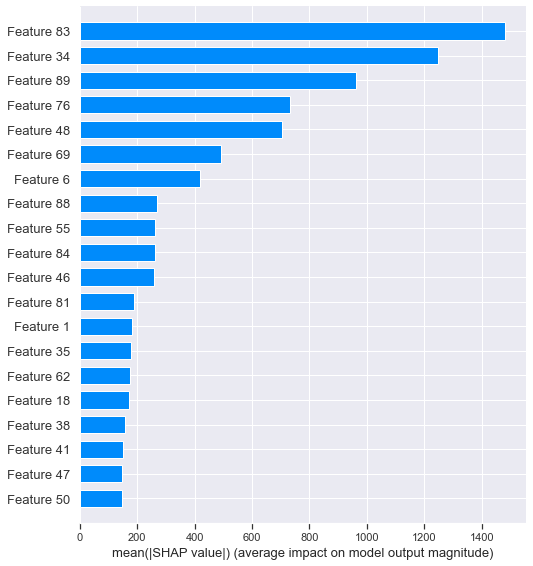

In [238]:
import shap

model=grid_search.best_estimator_
shap_values= shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Incorporación de datos previos al 2017:** Dado el comportamiento de la serie y al analizar su descomposición, se estima que aún agregando datos de años anteriores, no van a haber diferencias significativas en el rendimiento de los modelos.

## Interpretación de modelos

**Comparación y elección de modelos - Distribución de errores y análisis de gráficos**

Comparando los modelos entrenados en el proyecto, elegiría por su desempeño al Random Forest del One-Step Prediction. Aún así, al analizar la distribución de errores, se puede observar una nube de puntos acotada, por lo cual podría afirmarse que estos modelos tienen problemas para estimar valores bajos y valores altos. Aunque las métricas para evaluar el conjunto de train tienen valores altos, por ejemplo, para r2 (0.95), la brecha con el conjunto de test (r2=0) es demasiado amplia. Por eso, puede decirse que se trata de una variable con mucha dinámica, con mucha variación, y hay un error que, seguramente, es irreducible.

En definitiva, ninguno de los modelos es bueno para estimar el flujo diario. Y, si bien estiman bien los ciclos, no son buenos a la hora de estimar magnitudes.

Al realizar el GridSearch para un XGBoost se obtienen valores más altos de r2 para el conjunto de train (0.99), pero no se elige este modelo porque, a veces,  métricas mas bajas en el train ayuda a que generalice mejor después en el test. Aún al tener como mejor parámetro un max_depth de 5, sigue siendo mejor en términos de rendimiento, el Random Forest previemanete mencionado, es mejor, incluso con sus hiperparámetros por defecto.

Además, los niveles de error y gráficas mejoran en el One-Step Prediction en relación al modelo Benchmark dado que, en el Random Forest seleccionado, se aprecia cómo la estimación es mucho mejor que "copiarse" los datos del día anterior. 

Al trabajar con todos los modelos, en definitiva, se observa que los datos tienen demasiada dispersión incluso en una semana.


## Predicción 2020


A continuación, se importa el dataset del año 2020 y se procede a procesar los datos para luego incorporarlos al modelo creado con un One-Step Prediction, y así predecir el tráfico para el 2020.

In [239]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')


In [240]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [241]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020_reducido = data_2020[mask]

#Quitamos las columnas que no vamos a utilizar
data_2020_reducido.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion', 'dia', 'dia_fecha', 'mes', 'observacion'], inplace = True)

data_2020_reducido.reset_index(inplace=True, drop=True)

data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,fecha,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01 00:00:00,1.0,Auto,Centro,326.0
1,2020-01-01 00:00:00,1.0,Auto,Provincia,319.0
2,2020-01-01 00:00:00,2.0,Auto,Centro,199.0
3,2020-01-01 00:00:00,2.0,Auto,Provincia,180.0
4,2020-01-01 00:00:00,3.0,Auto,Centro,114.0


In [242]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020_reducido['fecha2'] = pd.to_datetime(data_2020_reducido.fecha) + pd.to_timedelta(data_2020_reducido.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020_reducido.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tipo_vehiculo,sentido,cantidad_pasos,fecha2
0,Auto,Centro,326.0,2020-01-01 01:00:00
1,Auto,Provincia,319.0,2020-01-01 01:00:00
2,Auto,Centro,199.0,2020-01-01 02:00:00
3,Auto,Provincia,180.0,2020-01-01 02:00:00
4,Auto,Centro,114.0,2020-01-01 03:00:00


In [243]:
#Corregimos el nombre de fecha2 a fecha
data_2020_reducido.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020_reducido.head()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Auto,Centro,326.0,2020-01-01 01:00:00
1,Auto,Provincia,319.0,2020-01-01 01:00:00
2,Auto,Centro,199.0,2020-01-01 02:00:00
3,Auto,Provincia,180.0,2020-01-01 02:00:00
4,Auto,Centro,114.0,2020-01-01 03:00:00


In [244]:
#Reordenamos el dataset por fecha
data_2020_reducido.sort_values('fecha', inplace = True)
data_2020_reducido.reset_index(drop=True, inplace = True)
data_2020_reducido


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Moto,Centro,7.0,2020-01-01 00:00:00
1,Auto,Provincia,423.0,2020-01-01 00:00:00
2,Auto,Centro,467.0,2020-01-01 00:00:00
3,Moto,Provincia,6.0,2020-01-01 00:00:00
4,Pesados 2 Ejes,Centro,1.0,2020-01-01 00:00:00
...,...,...,...,...
52369,Auto,Provincia,222.0,2020-12-31 20:00:00
52370,Auto,Provincia,106.0,2020-12-31 21:00:00
52371,Moto,Centro,5.0,2020-12-31 21:00:00
52372,Moto,Provincia,1.0,2020-12-31 21:00:00


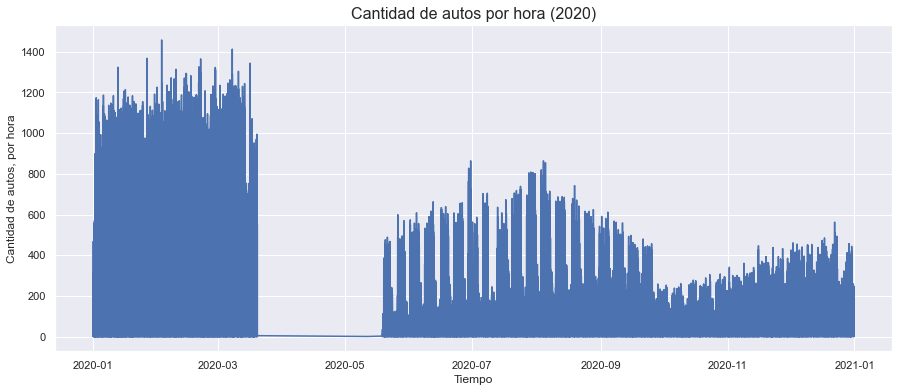

In [245]:
#Graficamos nuestros datos, tal como están, sólo para el 2020
plt.figure(figsize = (15,6))
plt.plot(data_2020_reducido.fecha, data_2020_reducido.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.title("Cantidad de autos por hora (2020)", fontsize = 16)
plt.show()

In [246]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2020 = data_2020_reducido.resample('D', on = 'fecha').sum()
print(diario2020.shape)
diario2020.head()

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0


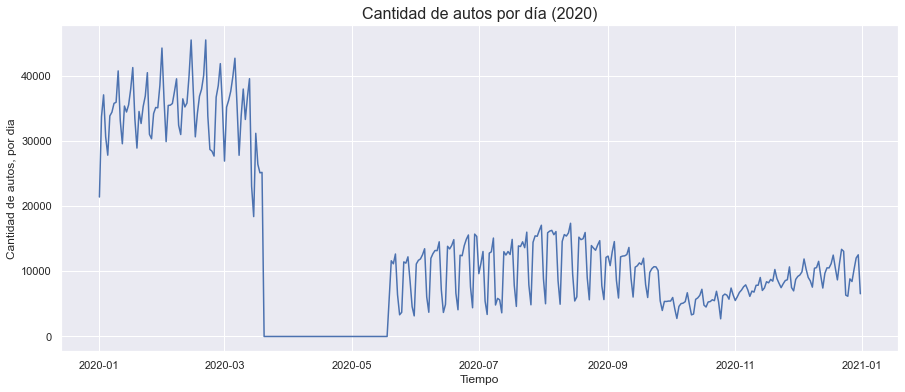

In [247]:
plt.figure(figsize = (15,6))
plt.plot(diario2020.index, diario2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Cantidad de autos por día (2020)", fontsize = 16)
plt.show()

En los gráficos de flujo por hora y día previamente visualizados, puede observarse cómo disminuye el tráfico a partir del mes de marzo cuando comienza el Aislamiento Social, Preventivo y Obligatorio (ASPO) decretado por el gobierno argentino, junto a un paquete de medidas restrictivas en materia de ciruclación. Inlcuso, hasta el mes de mayo, puede apreciarse cómo se obtienen valores casi nulos dada la liberación de peajes que tuvo lugar en muchas estaciones del Área Metropolitna de Buenos Aires (AMBA) por la pandemia y consecuente cuarentena impuesta.

In [248]:
serie_total=pd.concat([diario, diario2020])
serie_total.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


Text(0.5, 1.0, 'Cantidad de pasos según año')

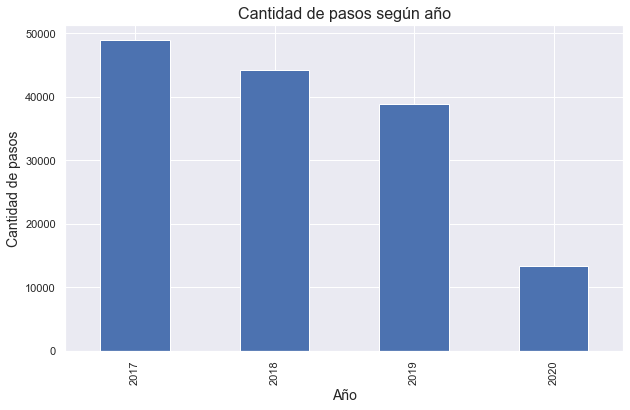

In [249]:
#Year wise count
serie_total.reset_index(inplace=True)

plt.figure(figsize = (10,6))
serie_total.groupby(serie_total.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)
plt.title("Cantidad de pasos según año", fontsize = 16)

Dado el contexto previamente mencionado para el año 2020, puede observarse cómo disminuye el promedio de casos diarios para los distintos años, alacanzando valores extremos para 2020. Puede pensarse que más allá del cambio en la forma de pago, esto se debe al contexto sanitario.

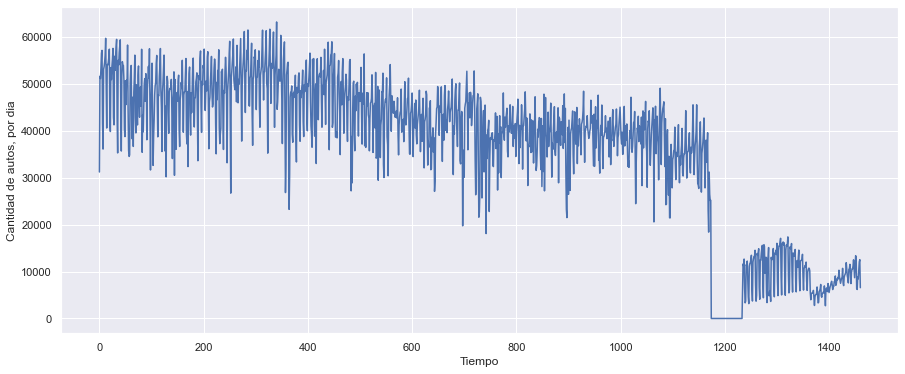

In [250]:
plt.figure(figsize = (15,6))
plt.plot(serie_total.index, serie_total.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

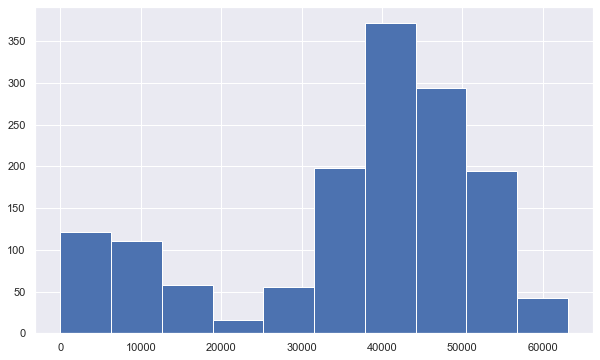

In [251]:
#Histograma para ver cómo es la distribución de la cantidad de pasos por día
plt.figure(figsize = (10,6))
plt.hist(serie_total.cantidad_pasos)
plt.show()

**Predicción a futuro**

**One-Step Prediction**

In [252]:
serie_total=pd.concat([diario, diario2020])
serie_total.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


In [253]:
look_back=90*1 

In [254]:
look_back

90

In [255]:
N=serie_total.shape[0]
X= np.zeros((N-look_back-1, look_back))
y= np.zeros(N-look_back-1)

print(X.shape, y.shape)

(1370, 90) (1370,)


In [256]:
for i in range(X.shape[0]):
    X[i,:] = serie_total.values[i:i+look_back].ravel()
    y[i] = serie_total.values[i+look_back]
    

In [257]:
diario1=serie_total.values[i:i+look_back].ravel()
np.shape(diario1)

(90,)

In [258]:
N_train = 3*365 - look_back
N_test = 1*365 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1005, 90) (1005,)
(365, 90) (365,)


In [259]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [260]:
X_train

array([[31183., 51568., 51093., ..., 51074., 46235., 52127.],
       [51568., 51093., 53332., ..., 46235., 52127., 50995.],
       [51093., 53332., 56486., ..., 52127., 50995., 38045.],
       ...,
       [37170., 39669., 34943., ..., 38168., 40182., 30681.],
       [39669., 34943., 35054., ..., 40182., 30681., 26259.],
       [34943., 35054., 43775., ..., 30681., 26259., 34523.]])

In [261]:
y_train_pred

array([47352.9       , 38278.6       , 47794.5       , ...,
       35702.56666667, 39056.7       , 33251.8       ])

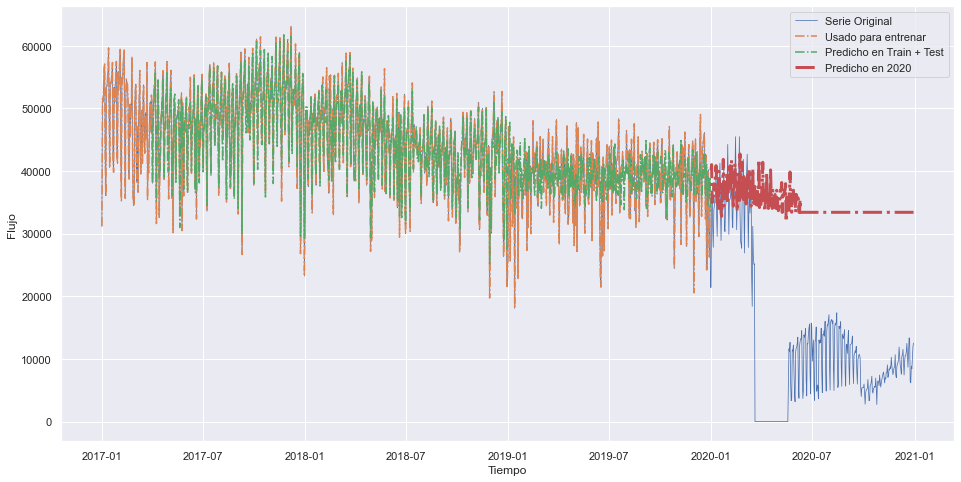

In [262]:
plt.figure(figsize=(16,8))
plt.plot(serie_total.index[:length_total], serie_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie_total.index[:N_train+look_back-1], serie_total[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(serie_total.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train + Test')
plt.plot(serie_total.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en 2020')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

**Análisis para el modelo con datos del 2020 incorporados:**

En primer lugar, puede afirmarse que al incorporar al análisis de datos los registro del 2020, lo que se observan no son outliers, sino que los valores difiere en gran medida a los trabajados para la muestra de los años 2017, 2018 y 2019. 

Al graficar las predicciones, se aprecia cómo las estimaciones de lo predicho en 2020 se alejan de la serie original, e incluso, empeora esa capacidad predictiva en relación a los años anteriores.

Además, alrededor del mes de julio, llega un punto en el que lo predicho en 2020 se tornan constantes, tomando valores mínimos. Esto puede ser debido a que el look back de los datos empieza a utilizar observaciones que ya están fuera de rango con lo que se había entrenado (marzo-mayo). Y así, ya asumimos que no sse va a poder estimar con un alto rendimiento.


**Random Forest 2020**

Finalmente, se entrena un modelo de Random Forest como el seleccionado con anterioridad, pero incorporando los datos del 2020. 

Al evaluarlo, se observan resultados más bajos para los valores del conjunto train (0.72), aún cuando se reduce la brecha exisitente con el conjunto test. Puede pensarse que, dado lo atípico de los datos del año 2020, el rendimiento del modelo es incluso peor a los trabajados con anterioridad.

Al mirar la importancia de los distintos features, en este caso también se aprecia cómo se marcan los ciclos semanales y el peso qué tiene tanto el día anterior, como el mismo día de la semana anterior, a la hora de predecir.

In [263]:
rf_total = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs = 4, max_depth=5).fit(X_train,y_train)

In [264]:
y_pred = rf_total.predict(X)
y_train_pred = rf_total.predict(X_train)
y_test_pred = rf_total.predict(X_test)

In [265]:
serie_total.index[N_train+look_back:length_total].shape

(365,)

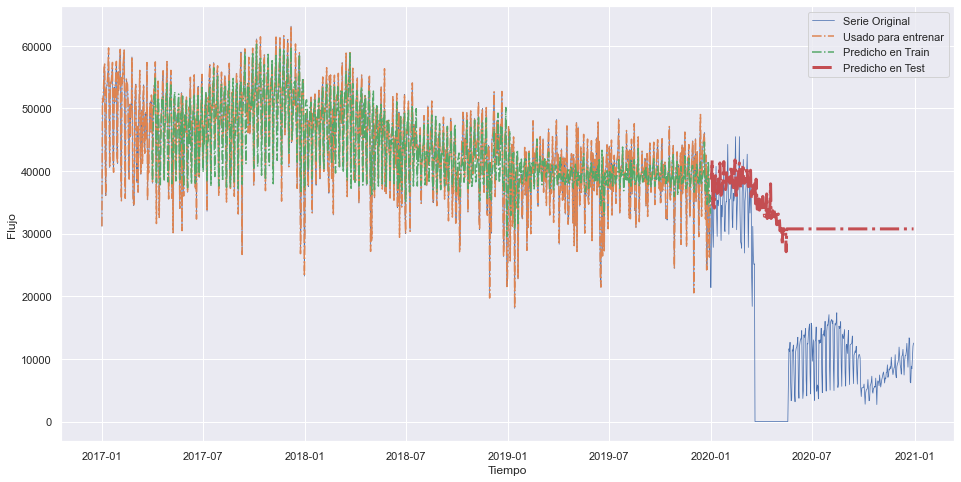

In [266]:
plt.figure(figsize=(16,8))
plt.plot(serie_total.index[:length_total], serie_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie_total.index[:N_train+look_back-1], serie_total[:N_train+look_back-1], '-.', label = 'Usado para entrenar')
plt.plot(serie_total.index[look_back: look_back+N_train], y_train_pred,'-.', label = 'Predicho en Train')
plt.plot(serie_total.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Graficar la importancia de cada feature

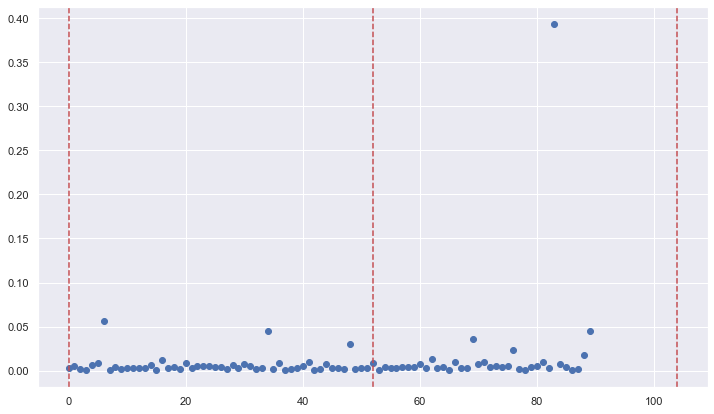

In [267]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*52:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [268]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 3866.4937861195403
Error en Test: 21821.60814092968


In [269]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

r2 en Train: 0.7288490473104543
r2 en Test: -2.190150324724877


### Para pensar, investigar y, opcionalmente, implementar

1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

Incorporaría los atributos categóricos (tipo de vehículo, forma de pago, etc) llevándolos a una forma numérica con encoders para poder usarlos en el entrenamiento y evaluación de modelos. Viendo cómo cambiaba la tendencia global de la serie cuando se incorporó una nueva forma de pago, pienso qué podrían mejorar las predicciones.


2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

Estimo que el comportamiento de las predicciones entre las distintas estaciones puede ser similar. Sin embargo, buscaría cómo información adicional cuáles son los puntos que esas estaciones conectan para ver si alguna es una ruta turística, lo que quizás tenga cierto peso en la comparación al tener un mayor flujo que el de las autopistas usadas simplemente para movilizarse a lugares de trabajo o domicilios particulares.

3. ¿Hay algo que te gustaría investigar o probar?

En un futuro proyecto, me gustaría probar este mismo flujo de trabajo pero incorporando el Telepase como forma de pago para ver cuál es el rendimiento de los modelos. Cuando esto se incluyó en la exploración de datos se observó como la tendencia de la serie era creciente, y me gustaría saber si trabajar con la serie total es una posibilidad a la hora de generar una mejor predicción.